# Keras Classification

Keras Documentation: https://keras.io

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## 1. Read data & create train/test split

In [2]:
df = pd.read_csv('../data/geoloc_elev.csv')

# we only use the 2 features that matter
X = df[['lat', 'lon']].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

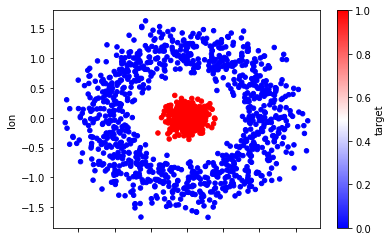

In [3]:
df.plot(kind='scatter',
        x='lat',
        y='lon',
        c='target',
        cmap='bwr');

## 2. Shallow neural network

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [6]:
model = Sequential()

model.add(Dense(1, input_dim=2, activation='sigmoid'))

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/10
945/945 [==============================] - 1s 1ms/step - loss: 0.6927 - acc: 0.5249 - val_loss: 0.6581 - val_acc: 0.6381
Epoch 2/10
945/945 [==============================] - 0s 131us/step - loss: 0.6457 - acc: 0.6582 - val_loss: 0.6561 - val_acc: 0.6381
Epoch 3/10
945/945 [==============================] - 0s 181us/step - loss: 0.6448 - acc: 0.6582 - val_loss: 0.6558 - val_acc: 0.6381
Epoch 4/10
945/945 [==============================] - 0s 138us/step - loss: 0.6431 - acc: 0.6582 - val_loss: 0.6546 - val_acc: 0.6381
Epoch 5/10
945/945 [==============================] - 0s 180us/step - loss: 0.6438 - acc: 0.6582 - val_loss: 0.6572 - val_acc: 0.6381
Epoch 6/10
945/945 [==============================] - 0s 135us/step - loss: 0.6444 - acc: 0.6582 - val_loss: 0.6557 - val_acc: 0.6381
Epoch 7/10
945/945 [==============================] - 0s 180us/step - loss: 0.6430 - acc: 0.6582 - val_loss: 0.6538 - val_acc: 0.6381
Epoch 8/10
945/945

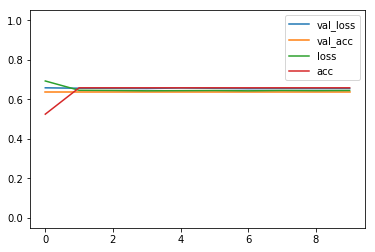

In [7]:
pd.DataFrame(h.history).plot(ylim=(-0.05, 1.05))

## 3. Deep neural network

In [8]:
model = Sequential()

model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/20
945/945 [==============================] - 0s 415us/step - loss: 0.5793 - acc: 0.7323 - val_loss: 0.4531 - val_acc: 0.6381
Epoch 2/20
945/945 [==============================] - 0s 178us/step - loss: 0.2727 - acc: 0.9640 - val_loss: 0.1282 - val_acc: 0.9905
Epoch 3/20
945/945 [==============================] - 0s 145us/step - loss: 0.0753 - acc: 1.0000 - val_loss: 0.0463 - val_acc: 1.0000
Epoch 4/20
945/945 [==============================] - 0s 194us/step - loss: 0.0318 - acc: 1.0000 - val_loss: 0.0225 - val_acc: 1.0000
Epoch 5/20
945/945 [==============================] - 0s 185us/step - loss: 0.0186 - acc: 1.0000 - val_loss: 0.0154 - val_acc: 1.0000
Epoch 6/20
945/945 [==============================] - 0s 155us/step - loss: 0.0133 - acc: 1.0000 - val_loss: 0.0111 - val_acc: 1.0000
Epoch 7/20
945/945 [==============================] - 0s 203us/step - loss: 0.0101 - acc: 1.0000 - val_loss: 0.0088 - val_acc: 1.0000
Epoch 8/20
945/9

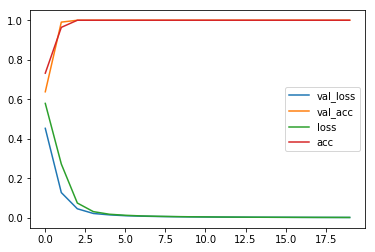

In [9]:
pd.DataFrame(h.history).plot(ylim=(-0.05, 1.05))

## 4. Accuracy score on benchmark, train and test sets

In [ ]:
bm_score = pd.Series(y).value_counts()[0] / len(y)
train_score = model.evaluate(X_train, y_train, verbose=0)[1]
test_score = model.evaluate(X_test, y_test,  verbose=0)[1]

print("""Accuracy scores:
   Benchmark:\t{:0.3}
   Train:\t{:0.3}
   Test:\t{:0.3}""".format(bm_score, train_score, test_score))

## 5. Confusion Matrix and Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict_classes(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

In [ ]:
print(classification_report(y_test, y_pred))

## 6. Display the decision boundary

In [ ]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

## Exercise 1

- Try changing the network architecture and re-train the model at each change. Can you make it converge faster?
    - add 1 inner layer
    - change the number of nodes in each layer
    - change the activation function
    - change the optimizer (have a look at https://keras.io/optimizers)